In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imb_degrees = ["very_low", "low", "normal", "high", "very_high"]
df = pd.read_csv('../clustering/normal/clustering_acc.csv')
df

,Unnamed: 0,Method,R_e,A@e,RA@e,Run,n_clusters,algorithm,n_components,max info loss,gini,p value
0,0,RF,1,0.276667,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,RF,2,0.476667,1.419580,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,RF,3,0.553333,1.638554,1,NaN,NaN,NaN,NaN,NaN,NaN
3,3,RF,4,0.623333,1.903743,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,RF,5,0.670000,2.119403,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,RF,6,0.693333,2.250000,1,NaN,NaN,NaN,NaN,NaN,NaN
956,956,RF,7,0.710000,2.361502,1,NaN,NaN,NaN,NaN,NaN,NaN
957,957,RF,8,0.733333,2.540909,1,NaN,NaN,NaN,NaN,NaN,NaN
958,958,RF,9,0.756667,2.740088,1,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = pd.read_csv('https://www.kaggle.com/kannanaikkal/ecoli-uci-dataset/download/ecoli.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 2


In [3]:
df["Method"].unique()

array(['RF', 'KMeans', 'Birch', 'GMM', 'SPH', 'SPH+CPI'], dtype=object)

In [4]:
merged_df = pd.DataFrame()
for imb in imb_degrees:
    df = pd.read_csv(f'../clustering/{imb}/clustering_acc.csv')
    df["imbalance"] = imb
    merged_df = pd.concat([merged_df, df])
merged_df["n_clusters"] = merged_df.apply(lambda x: x["n_clusters"] if np.isnan(x["n_components"]) else x["n_components"], axis="columns")
merged_df[(merged_df["Method"] == "SPH") & (merged_df["imbalance"] == "normal") & (merged_df["R_e"] == 1)]["A@e"]

310    0.370000
320    0.370000
330    0.373333
340    0.373333
Name: A@e, dtype: float64

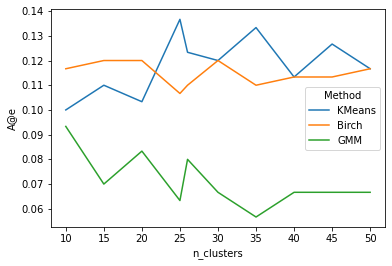

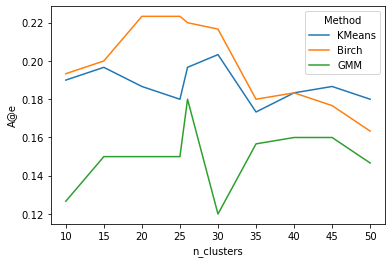

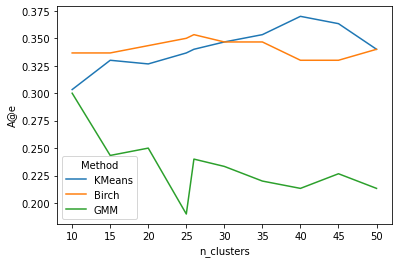

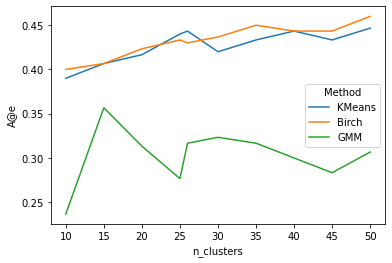

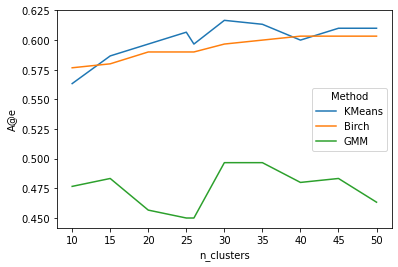

In [5]:
for imb in imb_degrees:
    sns.lineplot(data=merged_df[(merged_df["imbalance"] == imb) & (merged_df["Method"].isin(["KMeans", "Birch", "GMM"])) &(merged_df["R_e"].isin([1]))], hue="Method",x="n_clusters", y="A@e")
    plt.show()
    plt.close()

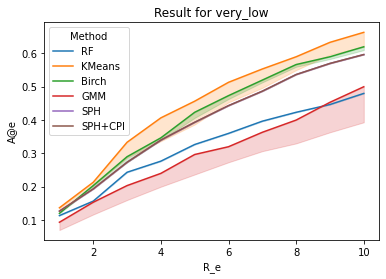

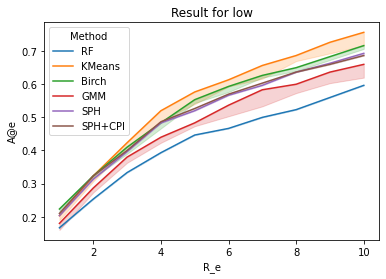

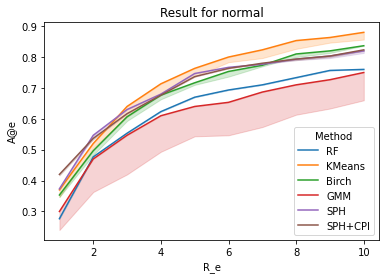

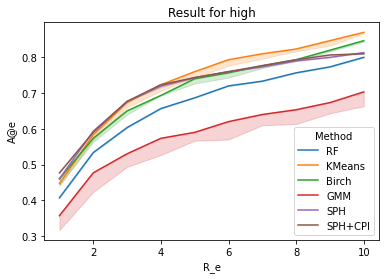

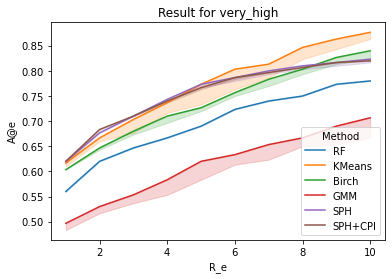

In [7]:
for imb in imb_degrees:
    imb_df = merged_df[merged_df["imbalance"] == imb]
    best_results = pd.DataFrame()
    for method in imb_df["Method"].unique():
        method_df = imb_df[imb_df["Method"] == method]
    ax = sns.lineplot(data=merged_df[merged_df["imbalance"] == imb], x="R_e", y="A@e", hue="Method", estimator=np.max)
    ax.set_title(f"Result for {imb}")
    plt.show()
    plt.close()

In [10]:
df = pd.read_csv('../clustering/normal/clustering_preds.csv')
df

,Unnamed: 0,group,target,correct_position,Method,Run,n_clusters,algorithm,n_components,max info loss,gini,p value
0,0,mde-OM1-6,68,0,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mde-OM1-4,54,1,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mde-OM3-13,45,1,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
3,3,mde-OM3-13,46,4,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,mde-OM3-13,46,3,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28795,295,mde-OM3-13,81,0,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
28796,296,mde-OM3-13,60,6,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
28797,297,hde-OM1-5,20,1,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
28798,298,mde-OM3-13,45,1,RF,1,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
kmeans_k_40_preds = df[(df["Method"] == "KMeans") & (df["n_clusters"] == 40)]

In [20]:
kmeans_k_40_preds["accuracy"] = kmeans_k_40_preds["correct_position"].apply(lambda x: 1 if x == 1 else 0)
kmeans_k_40_preds.groupby("group")["accuracy"].mean()

<ipython-input-20-a3781e636084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_k_40_preds["accuracy"] = kmeans_k_40_preds["correct_position"].apply(lambda x: 1 if x == 1 else 0)


group
0     0.000000
1     0.363636
10    0.166667
11    0.714286
13    0.444444
14    0.300000
15    1.000000
16    0.153846
17    0.166667
18    0.000000
19    0.000000
2     0.142857
20    0.153846
21    0.200000
22    0.400000
23    0.300000
24    0.000000
25    0.500000
26    0.375000
27    0.500000
28    1.000000
29    0.400000
3     0.166667
30    1.000000
31    0.714286
32    1.000000
33    0.545455
34    0.428571
37    1.000000
38    0.428571
39    1.000000
4     0.400000
5     0.250000
6     0.800000
7     0.500000
8     0.000000
9     0.375000
Name: accuracy, dtype: float64

In [22]:
df = pd.read_csv('../clustering/normal/clustering_stats.csv')
df

,Unnamed: 0,#Samples,missing,#Features,#Classes,Gini,#SPH,#CPI,Method,Run,n_clusters,algorithm,n_components,max info loss,gini,p value
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,RF,1,NaN,NaN,NaN,NaN,NaN,NaN
1,0,82.720000,13.104436,95.040000,26.620000,0.456383,0,0,KMeans,1,10.0,KMeans,NaN,NaN,NaN,NaN
2,0,53.475556,11.307902,90.595556,18.488889,0.405104,0,0,KMeans,1,15.0,KMeans,NaN,NaN,NaN,NaN
3,0,39.480000,11.122678,89.250000,14.910000,0.390074,0,0,KMeans,1,20.0,KMeans,NaN,NaN,NaN,NaN
4,0,31.283200,9.982419,87.443200,12.688000,0.363702,0,0,KMeans,1,25.0,KMeans,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,149.294118,9.965723,85.264706,11.470588,0.234993,6,5,SPH+CPI,1,NaN,NaN,NaN,0.4,0.4,0.75
92,0,149.294118,9.960169,85.264706,11.470588,0.222348,6,5,SPH+CPI,1,NaN,NaN,NaN,0.4,0.4,0.80
93,0,149.294118,9.959337,85.264706,11.470588,0.219962,6,5,SPH+CPI,1,NaN,NaN,NaN,0.4,0.4,0.85
94,0,149.294118,9.953550,85.264706,11.470588,0.209415,6,5,SPH+CPI,1,NaN,NaN,NaN,0.4,0.4,0.90
